In [1]:
import sys
sys.path.insert(1, '../architecture')
sys.path.insert(2, '../dataLoaders')
# import cv2 as cv
import matplotlib.pyplot as plt
import random
from pathlib import Path
import torch.nn as nn
import torchvision
from SuperDataLoader import *
import torchvision.transforms as T
from torchvision import transforms
from volvoDataLoader_onFly import *

from torch.utils.data import Dataset, DataLoader

from skimage import color



import torchvision.datasets as datasets
from PIL import ImageFile, Image, UnidentifiedImageError
from MapillaryIntendedObjs import *
import glob
from SuperDataLoader import *
from VolvoDataLoader import *
from torch.utils.data import Dataset, DataLoader
import numpy as np
import os, os.path
import torch
from pathlib import Path
from os.path import exists
from cityscapesscripts.helpers.labels import labels as city_labels
from torchvision.datasets import Cityscapes
import glob
# import albumentations as A
import json
from os.path import join
from torchvision import transforms
from MapillaryIntendedObjs import *

import torch.nn.functional as F


In [2]:
# imgs = glob.glob("../../../datasets/VolvoAnnotatedImages/rawDataset/images/*.jpg")

In [3]:
# imgs[0] = "../../../datasets/VolvoAnnotatedImages/rawDataset/images/14-45-15.492854_1583.jpg"

In [4]:
# imgs[0].replace("images", "masks").replace(".jpg", "_watershed_mask.png")

In [5]:
# imgs[0].replace("images", "masks_color").replace(".jpg", "_color_mask.png")

In [6]:
# mask = np.array(Image.open(imgs[0].replace("images", "masks").replace(".jpg", "_watershed_mask.png")))

In [7]:
# Image.open(imgs[0].replace("images", "masks_color").replace(".jpg", "_color_mask.png"))

In [8]:
args = {
    "volvoRootPath": "../../../datasets/VolvoAnnotatedImages/rawDataset/images",
    "mode": "train",
    "input_img_dim": [256,256],
    "reducedCategories": True
}

In [9]:
dataloader = volvo_onFly(**args)
train_loader = DataLoader(dataset = dataloader, batch_size = 50, shuffle = True, drop_last = True)

In [10]:
sample = dataloader[0]
sample["label"].shape

/home/lunet/wsmo6/.conda/envs/3.8/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([8, 256, 256])

In [11]:
batch = next(iter(train_loader))
segColour = dataloader.prMask_to_color(batch["label"])
# imgs = dataloader[11]

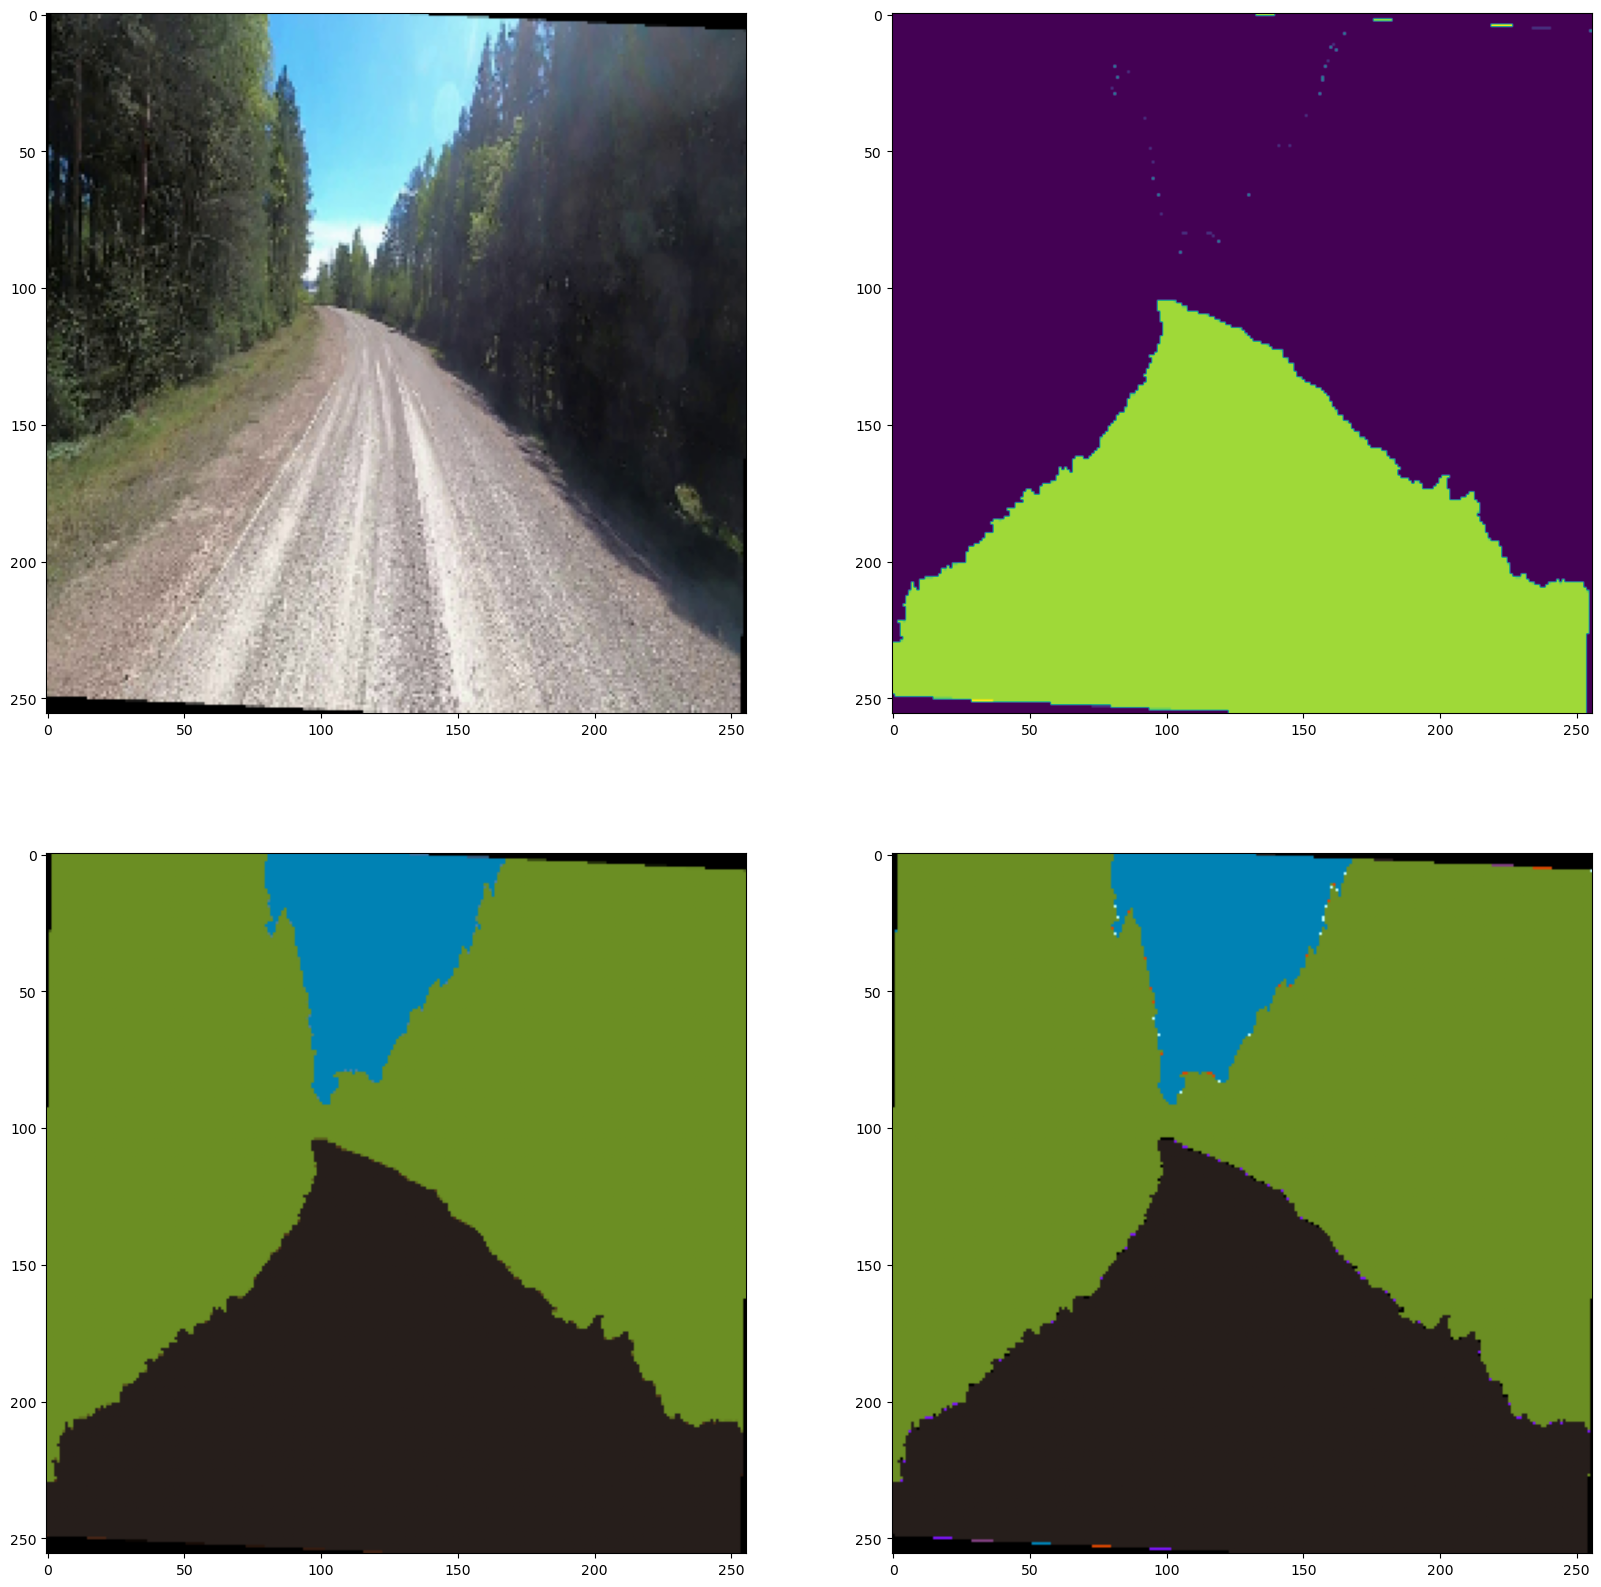

In [15]:
imgId = 37
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(20,20))

ax[0][0].imshow(batch["image"][imgId].permute(1, 2, 0))
ax[0][1].imshow(batch["FriLabel"][imgId].permute(1, 2, 0))
ax[1][0].imshow(batch["seg"][imgId].permute(1, 2, 0))
ax[1][1].imshow(segColour[imgId].permute(1, 2, 0))


plt.show()